# Figures

Stephanie Ward

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'rlang'

The following objects are masked from 'package:purrr':

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice

In [ ]:
d <- read_csv(here::here(path_ready, "ready_merg.csv"), show_col_types = FALSE)


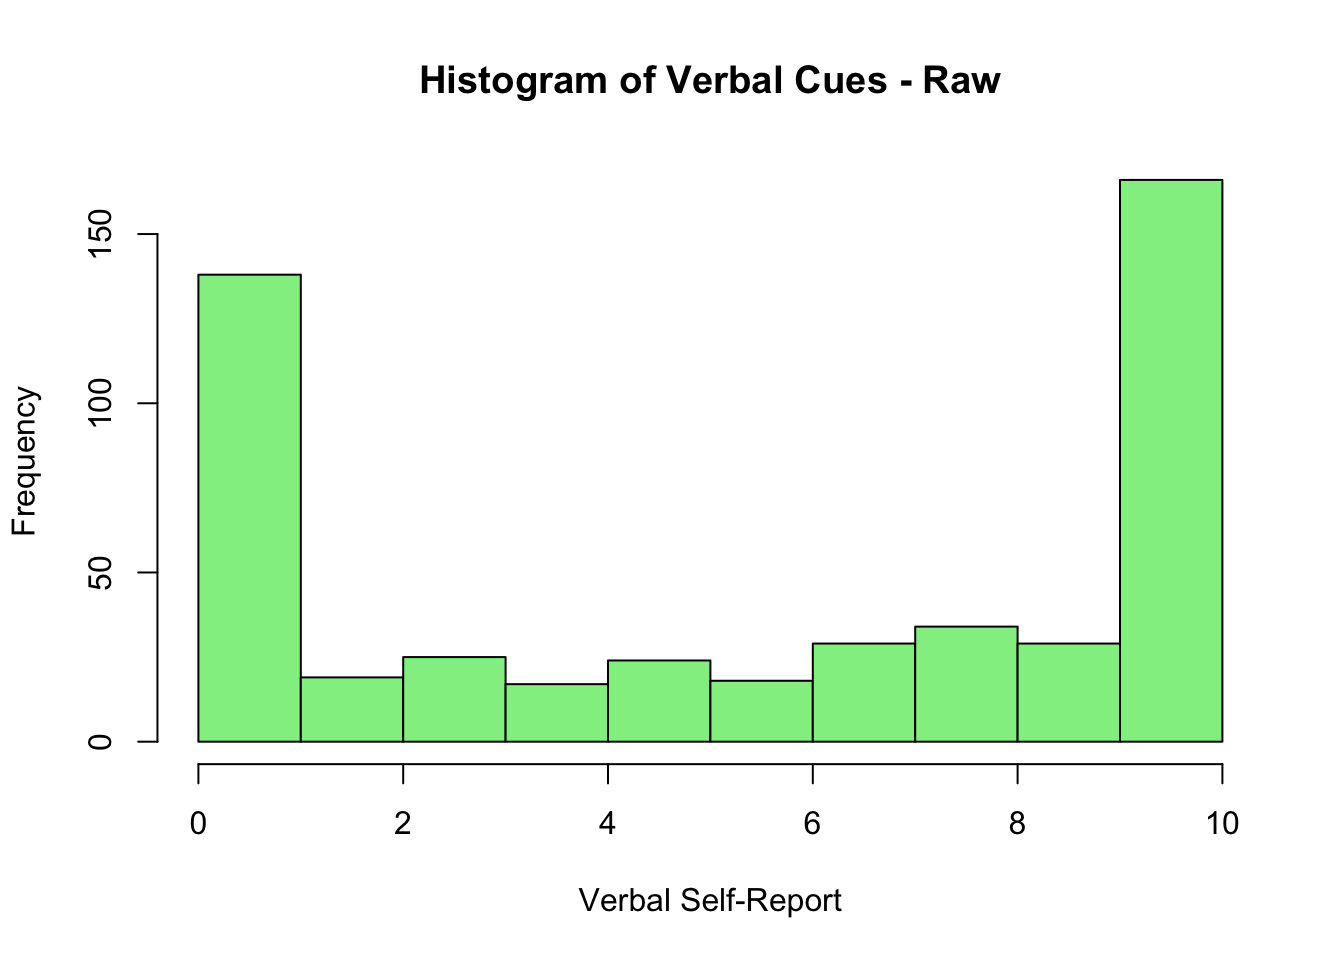

In [ ]:

d %>%
  pull(ver_pc) %>%
  hist(main = "Histogram of Verbal Cues - Raw",
       xlab = "Verbal Self-Report",
       col = "lightgreen",
       breaks = 10)


In [ ]:
d <- d %>%
  mutate(
    verb_bins = cut(
      ver_pc,
      breaks = c(-Inf, 0, 3, 6, 9, Inf),
      labels = c("Not at all", "A little", "Somewhat", "Quite a bit", "Very much"),
      right = TRUE,
      include.lowest = TRUE
    ),
    verb_bins = ordered(verb_bins,
                        levels = c("Not at all", "A little", "Somewhat", "Quite a bit", "Very much"))
  )

# Verify
is.ordered(d$verb_bins)


[1] TRUE

[1] "Not at all"  "A little"    "Somewhat"    "Quite a bit" "Very much"  


 Not at all    A little    Somewhat Quite a bit   Very much 
        121          61          59          92         166 

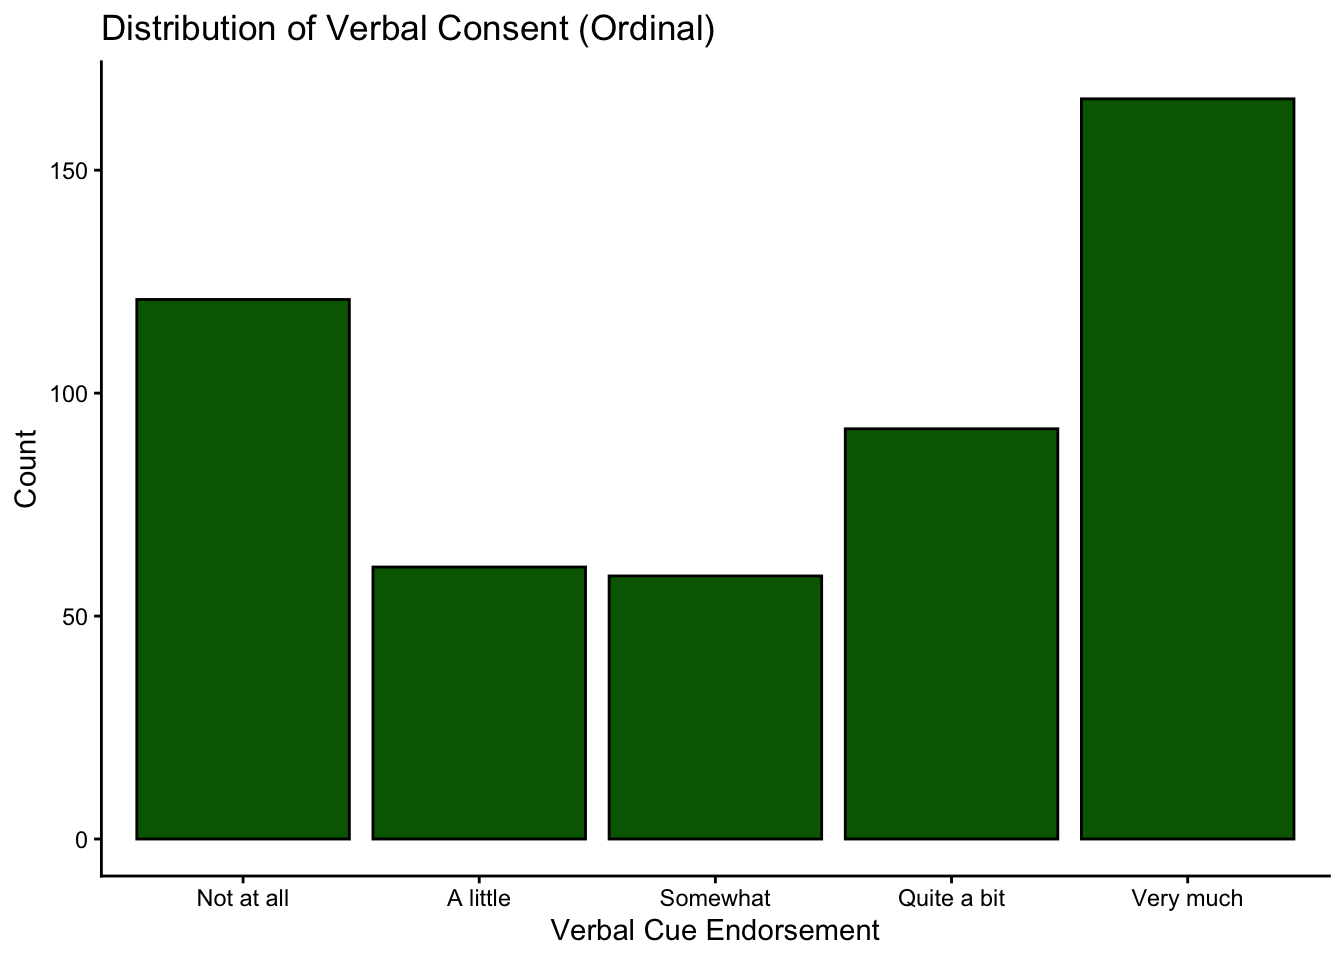

In [ ]:

d %>%
  ggplot(aes(x = verb_bins)) +
  geom_bar(fill = "darkgreen", color = "black") +
  labs(title = "Distribution of Verbal Consent (Ordinal)",
       x = "Verbal Cue Endorsement",
       y = "Count")


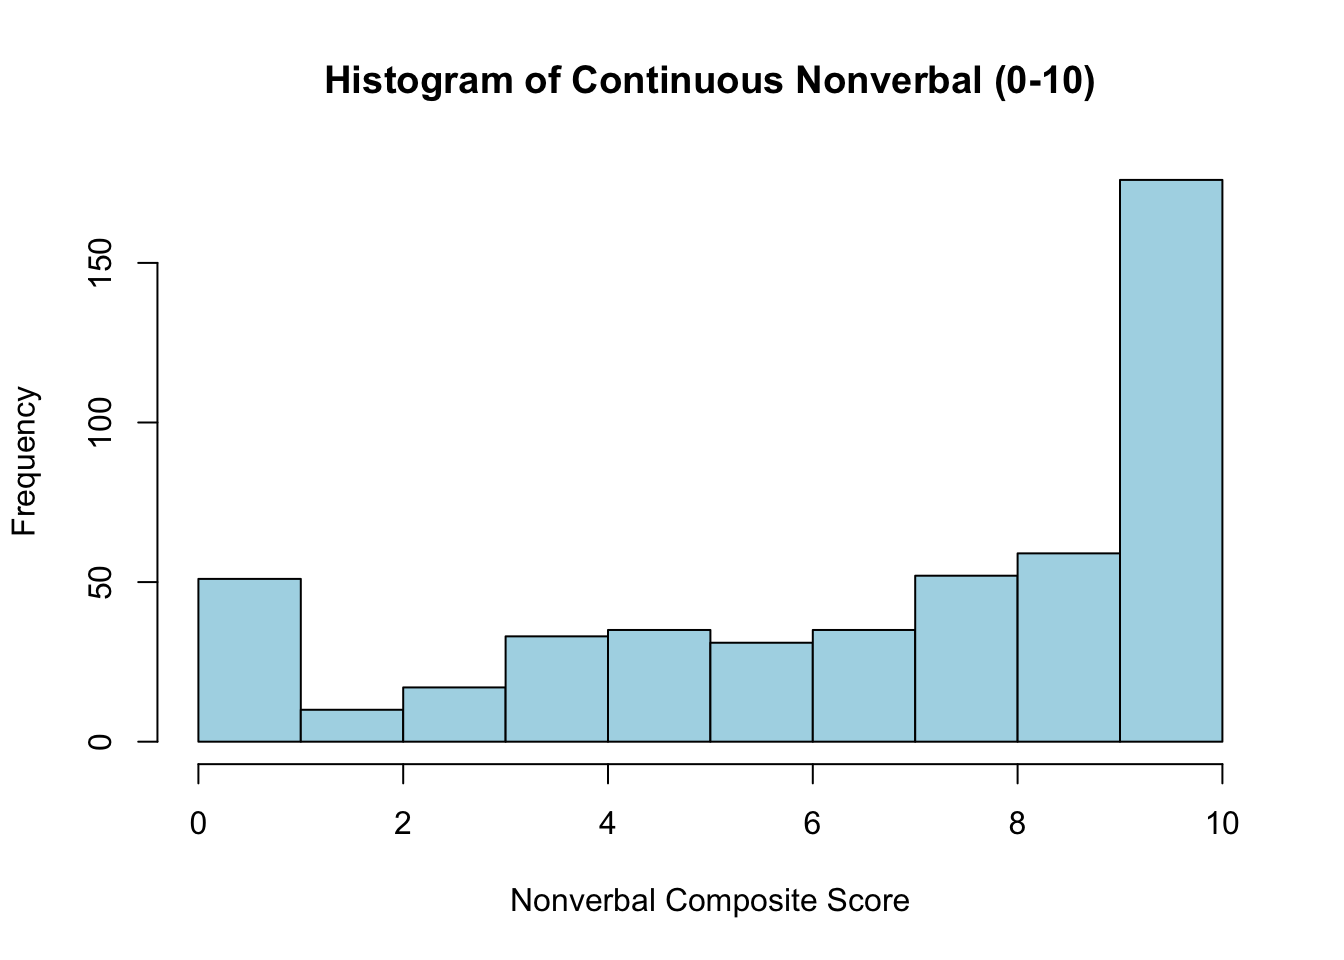

In [ ]:

d %>%  
  pull(non_verb) %>%
  hist(main = "Histogram of Continuous Nonverbal (0-10)",
       xlab = "Nonverbal Composite Score",
       col = "lightblue",
       breaks = 10)


In [ ]:
# Create ordered bins for nonverbal consent cues
d <- d %>%
  mutate(
    nonvb_bins = cut(
      non_verb,
      breaks = c(-Inf, 0, 3, 6, 9, Inf),
      labels = c("Not at all", "A little", "Somewhat", "Quite a bit", "Very much"),
      right = TRUE,
      include.lowest = TRUE
    ),
    nonvb_bins = ordered(nonvb_bins,
                         levels = c("Not at all", "A little", "Somewhat", "Quite a bit", "Very much"))
  )

# Verify
is.ordered(d$nonvb_bins)


[1] TRUE

[1] "Not at all"  "A little"    "Somewhat"    "Quite a bit" "Very much"  


 Not at all    A little    Somewhat Quite a bit   Very much 
         45          33          99         146         176 

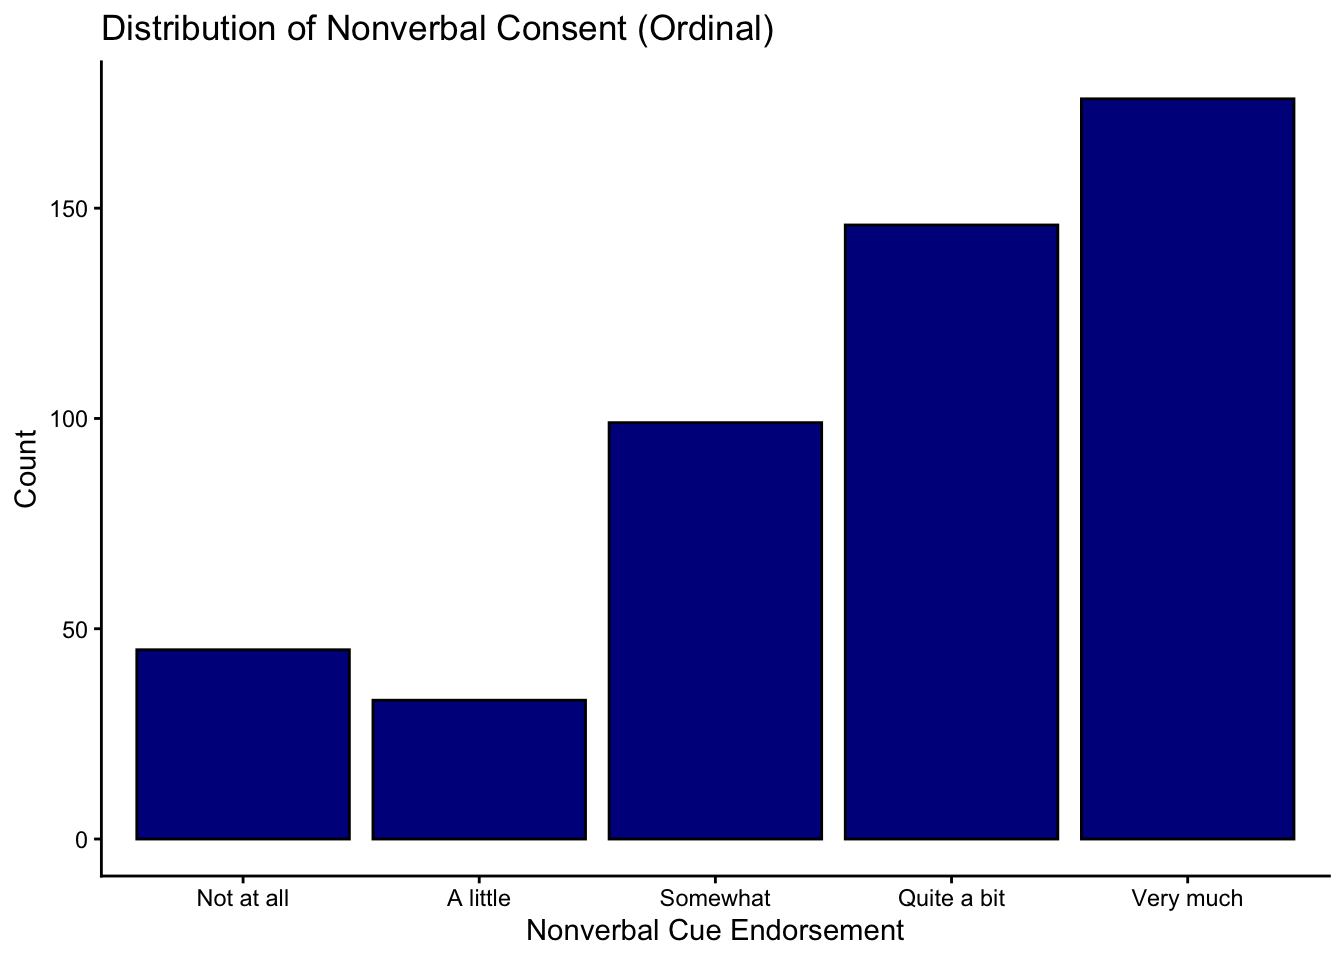

In [ ]:

d %>%
  ggplot(aes(x = nonvb_bins)) +
  geom_bar(fill = "darkblue", color = "black") +
  labs(title = "Distribution of Nonverbal Consent (Ordinal)",
       x = "Nonverbal Cue Endorsement",
       y = "Count")
